In [26]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

scrape_questions_and_answers_new_df =  pl.read_parquet('../data/all_questions_and_answer_new.parquet')

# Data Analysis

We scraped 9941 questions and answers from Avvo.

In [27]:
scrape_questions_and_answers_new_df.group_by('number').len().shape[0]

9941

Number of valid scraped questions

In [28]:
scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]


3074

Number of invalid scraped questions

In [29]:
scrape_questions_and_answers_new_df.filter(pl.col('title') == 'Not Found').shape[0]

6867

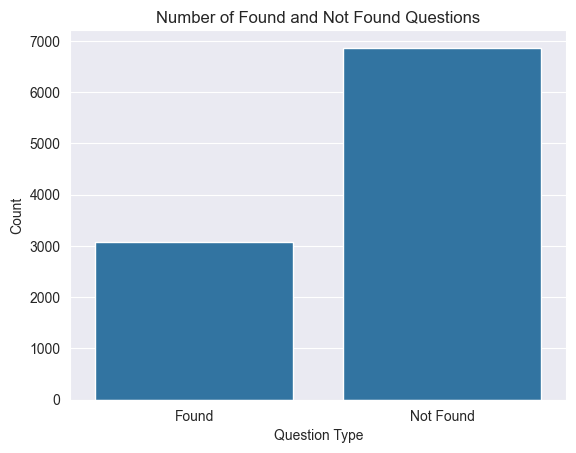

In [30]:
found_count = scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]
not_found_count = scrape_questions_and_answers_new_df.filter(pl.col('title') == 'Not Found').shape[0]

# Create a DataFrame with the counts
data = pl.DataFrame({
    'Question Type': ['Found', 'Not Found'],
    'Count': [found_count, not_found_count]
})

# Create the bar plot
sns.barplot(x='Question Type', y='Count', data=data)
plt.title('Number of Found and Not Found Questions')
plt.show()

## Time period of the scraped questions

<Axes: xlabel='posted_times', ylabel='len'>

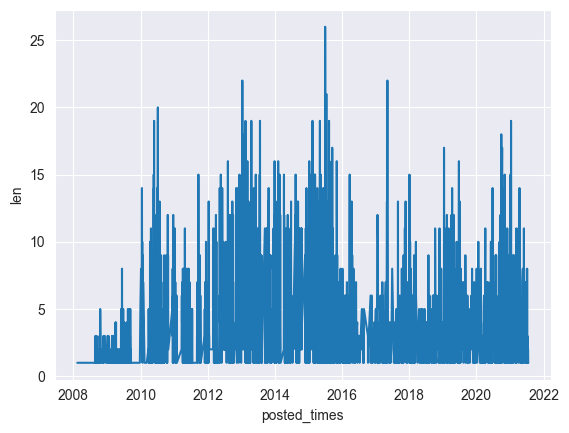

In [31]:
time_line_df = scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').group_by('posted_times').len().sort('posted_times')

sns.lineplot(time_line_df, x='posted_times', y='len')

## Earliest and latest scraped questions

In [32]:
print(f"min {scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').select('number','posted_times').unique().min()['posted_times'][0]}")
print(f"max {scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').select('number','posted_times').unique().max()['posted_times'][0]}")

min 2008-02-12 00:00:00
max 2021-07-18 00:00:00


## Number of lawyers who answered the questions

In [60]:
scrape_questions_and_answers_new_df.select('lawyers').unique().shape[0]

1915

## Differences in original mentioned lawyers and scraped lawyers

In [61]:
lawyerid_to_lawyerurl_df = pl.read_json('../data/lawyerid_to_lawyerurl.json').transpose(include_header=True).rename({'column': 'lawyer_id', 'column_0': 'lawyer'}).with_columns(pl.col('lawyer_id').cast(pl.Int64)).sort('lawyer_id')

lawyerid_to_lawyerurl_df.select('lawyer').unique().shape[0]

3741

In [56]:
scrape_questions_and_answers_new_df.select('lawyers').unique().join(lawyerid_to_lawyerurl_df.select('lawyer'), left_on='lawyers',right_on='lawyer', how='anti')

lawyers
str
null


In [54]:
lawyerid_to_lawyerurl_df.select('lawyer').unique().join(scrape_questions_and_answers_new_df.select('lawyers'), left_on='lawyer',right_on='lawyers', how='anti').shape[0]

1827

In [62]:
scrape_questions_and_answers_new_df.columns

['number',
 'url',
 'title',
 'question',
 'question_tags',
 'answers',
 'lawyers',
 'posted_times',
 'answer_card_text',
 'stars',
 'reviews',
 'rating',
 'helpful',
 'lawyers_agree',
 'best_answer']